## FeedForword NN

In [1]:
'''This helps in predicting no. of transaction when a customer has 'x' no. of children and
 'y' no. of bank accounts for four customers.'''

import numpy as np

#input_data = [#_of_children, #_of_accounts] for 4 customers
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

def relu(input):
    output = max(0, input)
    return output

def predict_with_network(input_data_row, weights):
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)
    
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)
    
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    return model_output

results = []

for input_data_row in input_data:
    results.append(predict_with_network(input_data_row, weights))
    
print(results)

[52, 63, 0, 148]


## Gradient_Descent

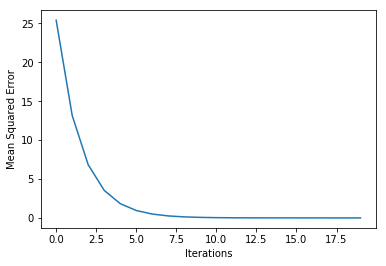

In [4]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def pred(input_data, target, weights):
    return ((input_data * weights).sum())

def get_slope(input_data, target, weights):
    preds = pred(input_data, target, weights)
    error = target - preds
    slope = 2 * input_data * error
    return slope

def get_mse(input_data, target, weights):
    preds = pred(input_data, target, weights)
    return mean_squared_error([preds], [target])

learning_rate = 0.01
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

n_updates = 20
mse_hist = []
for i in range(n_updates):
    slope = get_slope(input_data, target, weights)
    weights = weights + (learning_rate * slope)
    mse = get_mse(input_data, target, weights)
    mse_hist.append(mse)
    
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Gradient_Descent_orange

def problem(x):
    e = 2.71828182845904590
    return x[0]**5 + e**x[1] + x[0]**3 + x[0] + x[1] - 5

def error(x):
    return (problem(x)-0)**2

def gradient_descent(x):
    delta = 0.00000001

    derivative_x0 = (error([x[0] + delta, x[1]]) - error([x[0] - delta, x[1]])) / (delta * 2)
    derivative_x1 = (error([x[0], x[1] + delta]) - error([x[0], x[1] - delta])) / (delta * 2)

    alpha = 0.01
    x[0] = x[0] - derivative_x0 * alpha
    x[1] = x[1] - derivative_x1 * alpha
    return [x[0],x[1]]

x = [0.0, 0.0]
for i in range(50):
    x = gradient_descent(x)
    print('x = {:6f},{:6f}, problem(x) = {:6f}'.format(x[0],x[1],problem(x)))

# Stochastic_Gradient_Descent_With_LearningRates

In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sun May 9 12:05:43 2017
@author: neelabhpant
"""

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
import pandas as pd
import math
from keras.optimizers import SGD

'''Cleaning Training Data'''

train_data = pd.read_csv('../Brian2_scripts/Data/neelabhpant/train.csv')
train_survived = [i for i in train_data['Survived']]
train_pclass = [i for i in train_data['Pclass']]
train_age = [29.699118 if math.isnan(i) else i for i in train_data['Age']]
train_age_was_missing = [1 if math.isnan(i) else 0 for i in train_data['Age']]
train_sibsp = [i for i in train_data['SibSp']]
train_parch = [i for i in train_data['Parch']]
train_fare = [i for i in train_data['Fare']]
train_male = [1 if i == 'male' else 0 for i in train_data['Sex']]
train_embarked_from_cherbourg = [1 if i == 'C' else 0 for i in train_data['Embarked']]
train_embarked_from_queenstown = [1 if i == 'Q' else 0 for i in train_data['Embarked']]
train_embarked_from_southampton = [1 if i == 'S' else 0 for i in train_data['Embarked']]
train_dict = {'survived': train_survived,
              'pclass': train_pclass,
              'age': train_age,
              'age_was_missing': train_age_was_missing,
              'sibsp': train_sibsp,
              'parch': train_parch,
              'fare': train_fare,
              'male': train_male,
              'embarked_from_cherbourg': train_embarked_from_cherbourg,
              'embarked_from_queenstown': train_embarked_from_queenstown,
              'embarked_from_southampton': train_embarked_from_southampton}
train_df = pd.DataFrame(train_dict)
train_predictors = train_df.as_matrix(columns=train_df.columns[:10])
train_n_cols = train_predictors.shape[1]
train_target = to_categorical(train_df.survived)

'''Cleaning Testing Data'''

test_data = pd.read_csv('../Brian2_scripts/Data/neelabhpant/test.csv')
test_pclass = [i for i in test_data['Pclass']]
test_age = [29.699118 if math.isnan(i) else i for i in test_data['Age']]
test_age_was_missing = [1 if math.isnan(i) else 0 for i in test_data['Age']]
test_sibsp = [i for i in test_data['SibSp']]
test_parch = [i for i in test_data['Parch']]
test_fare = [i for i in test_data['Fare']]
test_male = [1 if i == 'male' else 0 for i in test_data['Sex']]
test_embarked_from_cherbourg = [1 if i == 'C' else 0 for i in test_data['Embarked']]
test_embarked_from_queenstown = [1 if i == 'Q' else 0 for i in test_data['Embarked']]
test_embarked_from_southampton = [1 if i == 'S' else 0 for i in test_data['Embarked']]
test_dict = {'pclass': test_pclass,
             'age': test_age,
             'age_was_missing': test_age_was_missing,
             'sibsp': test_sibsp,
             'parch': test_parch,
             'fare': test_fare,
             'male': test_male,
             'embarked_from_cherbourg': test_embarked_from_cherbourg,
             'embarked_from_queenstown': test_embarked_from_queenstown,
             'embarked_from_southampton': test_embarked_from_southampton}
test_df = pd.DataFrame(test_dict)
test_predictors = test_df.as_matrix()


def get_new_model(x):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(x,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return (model)


# Different Learning Rates to test the model
lr_to_test = [0.000001, 0.01, 1]

# Checking the model on different Learning Rates with Stochastic Gradient Descent as Optimizer

for lr in lr_to_test:
    print("\n\nTesting model with learning rate: %f\n" % lr)
    model = get_new_model(train_n_cols)
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    model.fit(train_predictors, train_target)




Using TensorFlow backend.




Testing model with learning rate: 0.000001

Epoch 1/10
891/891 [==============================] - 0s - loss: 5.4229     
Epoch 2/10
891/891 [==============================] - 0s - loss: 5.3936     
Epoch 3/10
891/891 [==============================] - 0s - loss: 5.3643     
Epoch 4/10
891/891 [==============================] - 0s - loss: 5.3347     
Epoch 5/10
891/891 [==============================] - 0s - loss: 5.3049     
Epoch 6/10
891/891 [==============================] - 0s - loss: 5.2750     
Epoch 7/10
891/891 [==============================] - 0s - loss: 5.2450     
Epoch 8/10
891/891 [==============================] - 0s - loss: 5.2147     
Epoch 9/10
891/891 [==============================] - 0s - loss: 5.1843     
Epoch 10/10
891/891 [==============================] - 0s - loss: 5.1539     


Testing model with learning rate: 0.010000

Epoch 1/10
891/891 [==============================] - 0s - loss: 1.5531     
Epoch 2/10
891/891 [==============================] - 0s - l

## Regresison_Using_Keras_NN

In [2]:
import pandas as pd
import numpy as np


def get_data(csv_file):
    cps = pd.read_csv(csv_file, header=1)
    cps = cps.drop('race', 1)
    cps = cps.drop('hispanic', 1)

    # Cleaning the data

    wage_per_hour = [round(i, 2) for i in cps['wage']]
    union = []
    education_yrs = [i for i in cps['educ']]
    experience_yrs = [i for i in cps['exper']]
    age = [i for i in cps['age']]
    female = []
    marr = []
    south = []
    manufacturing = []
    construction = []

    for i in cps['union']:
        if i == 'Not':
            union.append(0)
        else:
            union.append(1)

    for sex in cps['sex']:
        if sex == 'M':
            female.append(0)
        else:
            female.append(1)

    for marriage in cps['married']:
        if marriage == 'Single':
            marr.append(0)
        else:
            marr.append(1)

    for i in cps['south']:
        if i == 'NS':
            south.append(0)
        else:
            south.append(1)

    for i in cps['sector']:
        if i == 'manuf':
            manufacturing.append(1)
        else:
            manufacturing.append(0)

    for i in cps['sector']:
        if i == 'const':
            construction.append(1)
        else:
            construction.append(0)

    # Creating a dictionary for the final DataFrame

    my_dict = {'wage_per_hour': wage_per_hour,
               'union': union,
               'education_yrs': education_yrs,
               'experience_yrs': experience_yrs,
               'age': age,
               'female': female,
               'marr': marr,
               'south': south,
               'manufacturing': manufacturing,
               'construction': construction}

    # Final DataFrame

    df = pd.DataFrame(my_dict)

    # Creating Predictors and Targets labels
    predictors = df.as_matrix(columns=df.columns[:9])
    targets = [i for i in df['wage_per_hour']]
    target = np.array(targets)

    return [df, predictors, target]


[df, predictors, target] = get_data('../Brian2_scripts/Data/neelabhpant/cps.csv')  # Getting Data, Predictors and Target
import keras  # i Importing required keras packages
from keras.layers import Dense
from keras.models import Sequential

n_cols = predictors.shape[1]  # Setting up dimensions of an input
model = Sequential()  # Setting up a Sequential model

# We have 2 hidden layers
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))  # Setting up 1st Dense layers where each node is connected to every node in the next layer
model.add(Dense(32, activation='relu'))  # Setting up 2nd layer

# 1 output layer
model.add(Dense(1))  # Setting up final layer

# Compiling the model using 'adam' optimizer and MSE as loss function
model.compile(optimizer='adam', loss='mean_squared_error')
print("Loss function: " + model.loss)

# Fitting the model
model.fit(predictors, target)

Loss function: mean_squared_error
Epoch 1/10
534/534 [==============================] - 0s - loss: 29.9051     
Epoch 2/10
534/534 [==============================] - 0s - loss: 23.3382     
Epoch 3/10
534/534 [==============================] - 0s - loss: 22.0726     
Epoch 4/10
534/534 [==============================] - 0s - loss: 21.3969     
Epoch 5/10
534/534 [==============================] - 0s - loss: 21.3325     
Epoch 6/10
534/534 [==============================] - ETA: 0s - loss: 20.48 - 0s - loss: 21.1304     
Epoch 7/10
534/534 [==============================] - 0s - loss: 21.0013     
Epoch 8/10
534/534 [==============================] - 0s - loss: 20.8457     
Epoch 9/10
534/534 [==============================] - 0s - loss: 20.8263     
Epoch 10/10
534/534 [==============================] - 0s - loss: 20.7288     


## Classification_Using_keras.py

In [3]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sun May 7 16:15:43 2017
@author: neelabhpant
"""


import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
import pandas as pd
import math

'''Cleaning Training Data'''

train_data = pd.read_csv('../Brian2_scripts/Data/neelabhpant/train.csv')
train_survived = [i for i in train_data['Survived']]
train_pclass = [i for i in train_data['Pclass']]
train_age = [29.699118 if math.isnan(i) else i for i in train_data['Age']]
train_age_was_missing = [1 if math.isnan(i) else 0 for i in train_data['Age']]
train_sibsp = [i for i in train_data['SibSp']]
train_parch = [i for i in train_data['Parch']]
train_fare = [i for i in train_data['Fare']]
train_male = [1 if i=='male' else 0 for i in train_data['Sex']]
train_embarked_from_cherbourg = [1 if i=='C' else 0 for i in train_data['Embarked']]
train_embarked_from_queenstown = [1 if i=='Q' else 0 for i in train_data['Embarked']]
train_embarked_from_southampton = [1 if i=='S' else 0 for i in train_data['Embarked']]
train_dict = {'survived':train_survived,
              'pclass':train_pclass,
              'age':train_age,
              'age_was_missing':train_age_was_missing,
              'sibsp':train_sibsp,
              'parch':train_parch,
              'fare':train_fare,
              'male':train_male,
              'embarked_from_cherbourg':train_embarked_from_cherbourg,
              'embarked_from_queenstown':train_embarked_from_queenstown,
              'embarked_from_southampton':train_embarked_from_southampton}
train_df = pd.DataFrame(train_dict)
train_predictors = train_df.as_matrix(columns=train_df.columns[:10])
train_n_cols = train_predictors.shape[1]
train_target = to_categorical(train_df.survived)

'''Setting up the model'''

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(train_n_cols,)))
model.add(Dense(100, activation='tanh'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_predictors, train_target)


'''Cleaning Testing Data'''

test_data = pd.read_csv('../Brian2_scripts/Data/neelabhpant/test.csv')
test_pclass = [i for i in test_data['Pclass']]
test_age = [29.699118 if math.isnan(i) else i for i in test_data['Age']]
test_age_was_missing = [1 if math.isnan(i) else 0 for i in test_data['Age']]
test_sibsp = [i for i in test_data['SibSp']]
test_parch = [i for i in test_data['Parch']]
test_fare = [i for i in test_data['Fare']]
test_male = [1 if i=='male' else 0 for i in test_data['Sex']]
test_embarked_from_cherbourg = [1 if i=='C' else 0 for i in test_data['Embarked']]
test_embarked_from_queenstown = [1 if i=='Q' else 0 for i in test_data['Embarked']]
test_embarked_from_southampton = [1 if i=='S' else 0 for i in test_data['Embarked']]
test_dict = {'pclass':test_pclass,
              'age':test_age,
              'age_was_missing':test_age_was_missing,
              'sibsp':test_sibsp,
              'parch':test_parch,
              'fare':test_fare,
              'male':test_male,
              'embarked_from_cherbourg':test_embarked_from_cherbourg,
              'embarked_from_queenstown':test_embarked_from_queenstown,
              'embarked_from_southampton':test_embarked_from_southampton}
test_df = pd.DataFrame(test_dict)
test_predictors = test_df.as_matrix()


'''Making the predictions'''

predictions = model.predict(test_predictors)
predicted_prob_true = predictions[:,1]

print(predicted_prob_true)


Epoch 1/10
891/891 [==============================] - 0s - loss: 0.6270 - acc: 0.6655     
Epoch 2/10
891/891 [==============================] - 0s - loss: 0.5991 - acc: 0.6902     
Epoch 3/10
891/891 [==============================] - 0s - loss: 0.6047 - acc: 0.6734     
Epoch 4/10
891/891 [==============================] - 0s - loss: 0.6002 - acc: 0.6824     
Epoch 5/10
891/891 [==============================] - 0s - loss: 0.5913 - acc: 0.6970     
Epoch 6/10
891/891 [==============================] - 0s - loss: 0.5949 - acc: 0.6790     
Epoch 7/10
891/891 [==============================] - 0s - loss: 0.5801 - acc: 0.7071     
Epoch 8/10
891/891 [==============================] - 0s - loss: 0.5872 - acc: 0.6958     
Epoch 9/10
891/891 [==============================] - 0s - loss: 0.5640 - acc: 0.7239     
Epoch 10/10
891/891 [==============================] - 0s - loss: 0.5806 - acc: 0.6947     
[ 0.2425399   0.18980798  0.19601329  0.27374804  0.41992944  0.36463469
  0.31861785  0.